In [1]:
import numpy as np

data = open('Y_30.txt').readlines()[44:59]

Y = []
for row in data:
    Y.append(float(row.split()[5]))

y = np.array(Y)
x = np.loadtxt('X.txt')

МНК оценка a

In [2]:
xTx_inv = np.linalg.inv(np.dot(x.T, x))
a_est = xTx_inv.dot(x.T).dot(y)
y_pred = x.dot(a_est)
s_est = (y - y_pred).T.dot(y - y_pred)/(x.shape[0] - x.shape[1])
cov = s_est * xTx_inv
s_err_i = np.sqrt(np.diag(cov))

n = len(xTx_inv)
corr = np.copy(xTx_inv)
for i in range(n):
    for j in range(n):
        corr[i, j] /= np.sqrt(xTx_inv[i, i] * xTx_inv[j, j])

print(f"МНК-оценка для а: {a_est}\n")
print(f"Оценка дисперсии s\u00b2: {s_est}\n")
print(f"Оценка матрицы ковариаций:\n{cov}\n")
print(f"Стандартная ошибка оценки i-го коэффициента: {s_err_i}\n")
print(f"Матрица корреляций: \n{corr}")

МНК-оценка для а: [  0.40610203   0.29597226   3.05760609 -13.65257603]

Оценка дисперсии s²: 1.606939610343435

Оценка матрицы ковариаций:
[[ 3.92507856e-04 -2.25756249e-03 -3.28579391e-03  1.42325656e-01]
 [-2.25756249e-03  3.51747675e-02 -6.19847178e-02 -2.29967349e+00]
 [-3.28579391e-03 -6.19847178e-02  3.68615523e-01  3.70776490e+00]
 [ 1.42325656e-01 -2.29967349e+00  3.70776490e+00  1.55954794e+02]]

Стандартная ошибка оценки i-го коэффициента: [ 0.01981181  0.18754937  0.60713715 12.48818618]

Матрица корреляций: 
[[ 1.         -0.60757513 -0.27316769  0.57525401]
 [-0.60757513  1.         -0.54435498 -0.98186368]
 [-0.27316769 -0.54435498  1.          0.48901932]
 [ 0.57525401 -0.98186368  0.48901932  1.        ]]


Гистограмма остатков

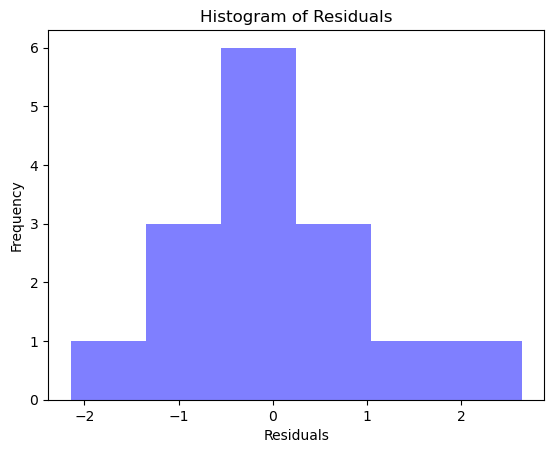

In [3]:
import matplotlib.pyplot as plt

residuals = y - y_pred
plt.hist(residuals, bins=6, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

График регрессии и оцененной регрессии

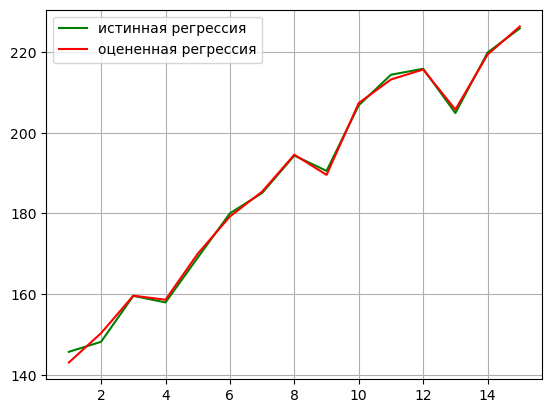

In [4]:
X = np.arange(1, 16)

plt.plot(X, y, color='g', label="истинная регрессия")
plt.plot(X, y_pred, color='r', label="оцененная регрессия")
plt.grid()
plt.legend(loc="upper left")
plt.show()

Коэффициент детерминации смещенный и несмещенный

In [5]:
err = y - y_pred
y_mean = np.mean(y)
R = 1 - np.sum(np.square(err))/np.sum(np.square(y - y_mean))
R_unb = 1 - np.sum(np.square(err))/(x.shape[0]-x.shape[1])/(np.sum(np.square(y - y_mean))/(x.shape[0]-1))
print(f"Коэффициент детерминации R\u00b2: {R}\nНесмещенный R\u00b2: {R_unb}")

Коэффициент детерминации R²: 0.99825632602224
Несмещенный R²: 0.99778077857376


 Доверительные интервалы для коэффициентов регрессии

In [6]:
from scipy.stats import t
alfa = 0.05

st = t(x.shape[0] - x.shape[1])
q = st.ppf(1 - alfa / 2)
a_intervals = np.array([a_est - s_err_i*q, a_est + s_err_i*q])
for i in range(x.shape[1]):
    print(f"Интервал {i+1} = {[a_intervals[0][i], a_intervals[1][i]]}\n")
print(f"a_est = {a_est}")

Интервал 1 = [0.3624965237525463, 0.44970752783208395]

Интервал 2 = [-0.11682113134126498, 0.7087656438737933]

Интервал 3 = [1.7213062285031873, 4.393905958469412]

Интервал 4 = [-41.13888849835052, 13.833736430926812]

a_est = [  0.40610203   0.29597226   3.05760609 -13.65257603]


Обобщенная доверительная область на основе принципа Тьюки

In [7]:
q = st.ppf(1 - alfa/(2 * x.shape[1]))

tukey_intervals = np.array([a_est - q*s_err_i, a_est + q*s_err_i])
for i in range(x.shape[1]):
    print(f"Интервал Тьюки {i+1} = {[tukey_intervals[0][i], tukey_intervals[1][i]]}\n")
print(f"a_est = {a_est}")

Интервал Тьюки 1 = [0.3470455445705594, 0.46515850701407085]

Интервал Тьюки 2 = [-0.26308849990794037, 0.8550330124404686]

Интервал Тьюки 3 = [1.2478076921048336, 4.867404494867765]

Интервал Тьюки 4 = [-50.87826591208596, 23.573113844662252]

a_est = [  0.40610203   0.29597226   3.05760609 -13.65257603]


Проверка гипотезы о равенстве нулю коэффициентов

In [8]:
q = st.ppf(1 - alfa / 2)

res = np.abs(a_est)/s_err_i <= q
print(res)

[False  True False  True]


Посмотрим, что будет, если убрать второй и четвертый коэффициенты

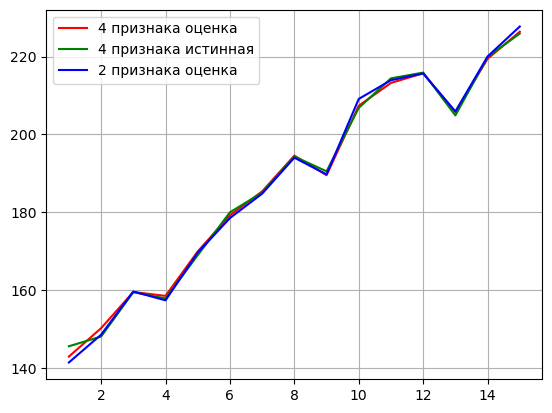

In [9]:
new_X = np.delete(x, [1, 3], axis=1)
xTx_inv_new = np.linalg.inv(np.dot(new_X.T, new_X))
a_new = xTx_inv_new.dot(new_X.T).dot(y)
y_new_pred = new_X.dot(a_new)
plt.plot(X, y_pred, color="r", label='4 признака оценка')
plt.plot(X, y, color='g', label='4 признака истинная')
plt.plot(X, y_new_pred, color='b', label='2 признака оценка')
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [10]:
s_est_new = (y - y_new_pred).T.dot(y - y_new_pred)/(new_X.shape[0] - new_X.shape[1])
cov_new = s_est_new * xTx_inv_new
s_err_i_new = np.sqrt(np.diag(cov_new))

n = len(xTx_inv_new)
corr_new = np.copy(xTx_inv_new)
for i in range(n):
    for j in range(n):
        corr_new[i, j] /= np.sqrt(xTx_inv_new[i, i] * xTx_inv_new[j, j])

print(f"МНК-оценка для а: {a_new}\n")
print(f"Оценка дисперсии s\u00b2: {s_est_new}\n")
print(f"Оценка матрицы ковариаций:\n{cov_new}\n")
print(f"Стандартная ошибка оценки i-го коэффициента: {s_err_i_new}\n")
print(f"Матрица корреляций: \n{corr_new}")

МНК-оценка для а: [0.43045485 3.92952966]

Оценка дисперсии s²: 2.383415183399605

Оценка матрицы ковариаций:
[[ 0.00035991 -0.01125475]
 [-0.01125475  0.35328347]]

Стандартная ошибка оценки i-го коэффициента: [0.01897136 0.59437654]

Матрица корреляций: 
[[ 1.         -0.99810336]
 [-0.99810336  1.        ]]


In [11]:
st = t(new_X.shape[0] - new_X.shape[1])
q = st.ppf(1 - alfa / 2)
a_intervals = np.array([a_new - s_err_i_new*q, a_new + s_err_i_new*q])
for i in range(new_X.shape[1]):
    print(f"Интервал {i+1} = {[a_intervals[0][i], a_intervals[1][i]]}\n")
print(f"a_est = {a_new}")

Интервал 1 = [0.38946970964599126, 0.47143998998232883]

Интервал 2 = [2.645457216185781, 5.2136021087882884]

a_est = [0.43045485 3.92952966]


In [12]:
q = st.ppf(1 - alfa/(2 * new_X.shape[1]))

tukey_intervals = np.array([a_new - q*s_err_i_new, a_new + q*s_err_i_new])
for i in range(new_X.shape[1]):
    print(f"Интервал Тьюки {i+1} = {[tukey_intervals[0][i], tukey_intervals[1][i]]}\n")
print(f"a_est = {a_new}")

Интервал Тьюки 1 = [0.3824072559382137, 0.4785024436901064]

Интервал Тьюки 2 = [2.4241891621490037, 5.4348701628250655]

a_est = [0.43045485 3.92952966]


Прогноз для наблюдения

In [ ]:
x_real, y_real = x[0, :], y[0]
X, Y = x[1:, :], y[1:]
xtx = X.T.dot(X)
a = np.linalg.inv( np.array([[xtx]]) if isinstance(xtx, float) else xtx).dot(X.T).dot(Y)
y_predict = x_real.T.dot(a)
y_pr = X.dot(a)
var = (Y - y_pr).T.dot(Y - y_pr) / (X.shape[0] - X.shape[1])
variance_t = var * (x_real.T.dot(np.linalg.inv(X.T.dot(X))).dot(x_real) + 1)
print(variance_t)

In [16]:
x_real, y_real = x[0, :], y[0]
X, Y = x[1:, :], y[1:]
xTx_inv = np.linalg.inv(X.T.dot(X))
a = xTx_inv.dot(X.T).dot(Y)
y_predict = x_real.T.dot(a)

print(f"Искомое значение y = {y_real}\nПредсказанное значение y = {y_predict}")
y_pr = X.dot(a)
s_est = (Y - y_pr).T.dot(Y - y_pr)/(X.shape[0] - X.shape[1])
# print((x_real.T.dot(x_real)))
s_t = s_est * (x_real.T.dot(np.linalg.inv(X.T.dot(X))).dot(x_real)+1)
st = t(X.shape[0] - X.shape[1])
q = st.ppf(1 - alfa / 2)
interval = np.array([y_predict - q, y_predict + q])
print(f"Дисперсия равна: {s_t}")
print(f"Интервал значения: {interval}")

Искомое значение y = 145.67823
Предсказанное значение y = 142.0582957009291
Дисперсия равна: 1.1105234407011382
Интервал значения: [139.83015685 144.28643455]


In [ ]:
from scipy.stats import f

xTx_inv = np.linalg.inv(np.dot(x.T, x))
a_est = xTx_inv.dot(x.T).dot(y)
y_pred = x.dot(a_est)
s_est = (y - y_pred).T.dot(y - y_pred)/(x.shape[0] - x.shape[1])
cov = s_est * xTx_inv
s_err_i = np.sqrt(np.diag(cov))
err = y - y_pred
y_mean = np.mean(y)
R = 1 - np.sum(np.square(err))/np.sum(np.square(y - y_mean))
F = f(x.shape[1]-1, x.shape[0] - x.shape[1])
q = F.ppf(1-alfa)
t_st = R/(1-R) * (x.shape[0] - x.shape[1])/(x.shape[1]-1)

if t_st <= q:
    print("набор независимых переменных x не оказывает значимого статистического влияния на переменную y")
else:
    print("существует хотя бы один фактор, значимо влияющий на зависимую переменную")